# Part 1 - Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_excel('RP_trough_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1748 non-null   float64
 1   Standoff distance  1748 non-null   float64
 2   Angle              1748 non-null   int64  
 3   Trough time        1748 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 54.8 KB


In [3]:
dataset.head()

,Mass,Standoff distance,Angle,Trough time
0,0.5,5.0,0,11.083063
1,0.5,5.0,15,13.893293
2,0.5,5.0,30,15.724705
3,0.5,5.0,45,21.162968
4,2.5,5.0,0,11.836605


In [4]:
y = dataset['Trough time']
X = dataset.drop(['Trough time'], axis=1)
print(X.shape, y.shape)

(1748, 3) (1748,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [8]:
ann = tf.keras.models.Sequential()

In [9]:
ann.add(tf.keras.layers.Dense(units=8,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=7,
                              activation='leaky_relu'))

In [10]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 7)                 63        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [13]:
# protects from unnecessary further training of the model
#if a particular metric does not continue to improve over a number of n epochs.
#In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [14]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
41/41 [==============================] - 1s 9ms/step - loss: 1809.4861 - mae: 32.0021 - val_loss: 899.9266 - val_mae: 25.7243
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 346.6935 - mae: 14.6619 - val_loss: 73.8511 - val_mae: 6.8466
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 70.7914 - mae: 6.4106 - val_loss: 56.3929 - val_mae: 5.8333
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 58.6240 - mae: 5.8934 - val_loss: 51.3792 - val_mae: 5.4812
Epoch 5/500
41/41 [==============================] - 0s 5ms/step - loss: 55.9563 - mae: 5.7118 - val_loss: 49.3588 - val_mae: 5.3145
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 54.0370 - mae: 5.5250 - val_loss: 60.4402 - val_mae: 5.8799
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 52.5425 - mae: 5.4787 - val_loss: 50.3025 - val_mae: 5.4001
Epoch 8/500
41/41 [==============================] - 0s 3ms/st

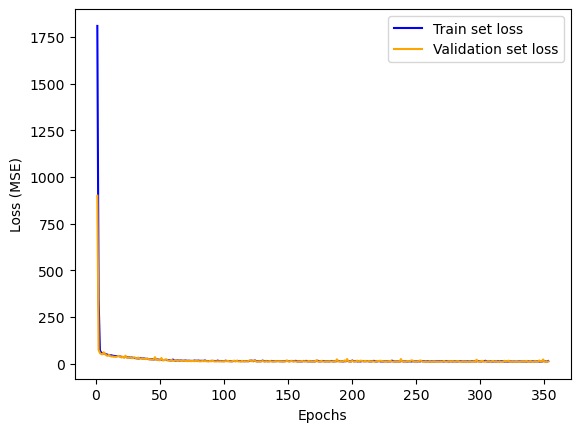

In [15]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Trough_ANN2_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

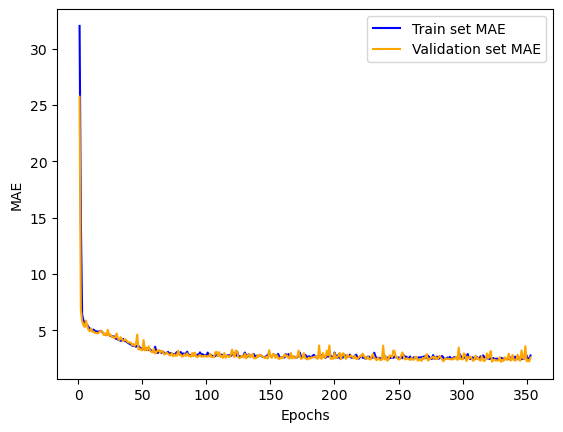

In [16]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Trough_ANN2_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [29]:
ann.save('Trough_ANN2')

INFO:tensorflow:Assets written to: Trough_ANN2\assets


# Part 4 - Make predictions

9/9 [==============================] - 0s 2ms/step


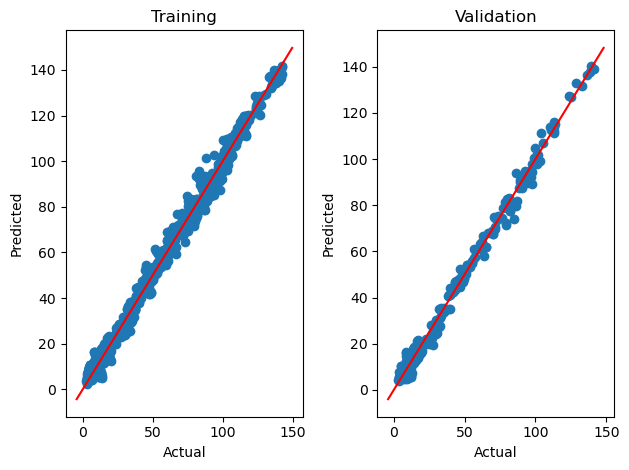

In [17]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Trough_ANN2_1.png', dpi = 300, bbox_inches = 'tight')
# show the plot
plt.show()

In [18]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 2ms/step
[[ 41.87  41.31]
 [  9.09   8.44]
 [ 59.73  53.27]
 [ 90.38  94.08]
 [  8.56   7.23]
 [  7.95   7.85]
 [  7.9   10.84]
 [ 73.29  79.88]
 [ 67.77  71.3 ]
 [ 14.46  16.22]
 [ 62.04  58.99]
 [ 91.11  98.32]
 [ 83.23  84.08]
 [ 34.93  38.94]
 [  6.89   7.86]
 [ 35.    35.43]
 [102.6  104.25]
 [ 24.91  31.5 ]
 [  6.58   7.52]
 [ 15.28  17.7 ]
 [114.89 112.9 ]
 [ 11.17   8.66]
 [  8.67   8.55]
 [ 10.04  10.46]
 [  6.49   4.62]
 [ 62.31  61.22]
 [ 25.1   27.06]
 [ 23.49  18.44]
 [ 12.7   10.37]
 [ 65.1   71.42]
 [ 23.54  29.24]
 [ 35.68  41.29]
 [ 82.25  83.07]
 [  7.     5.65]
 [120.65 118.23]
 [141.14 143.87]
 [  6.81   6.22]
 [ 85.41  85.12]
 [ 80.65  78.41]
 [ 39.42  40.28]
 [ 62.09  62.7 ]
 [ 40.71  42.95]
 [117.13 112.24]
 [111.32 108.52]
 [ 22.83  17.59]
 [ 45.27  43.66]
 [118.38 118.64]
 [  7.61   5.66]
 [  5.7    6.61]
 [ 67.94  76.29]
 [119.39 119.67]
 [101.99 102.71]
 [  6.33   9.12]
 [ 54.76  54.16]
 [ 30.83  29.36]
 [137.39 133.7

Text(0, 0.5, 'Predicted data')

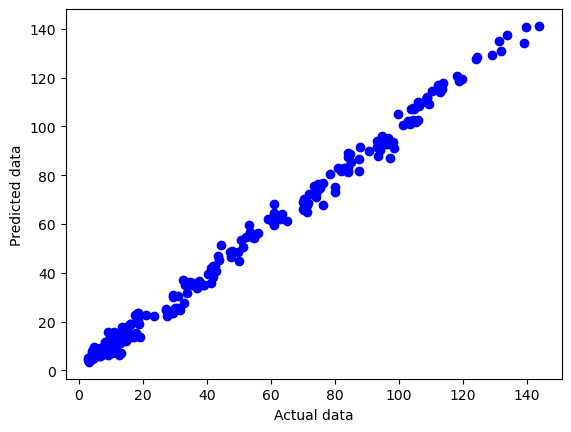

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.085],[0,0.085], color = "red")
#plt.axis ([0,0.085,0,0.085])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

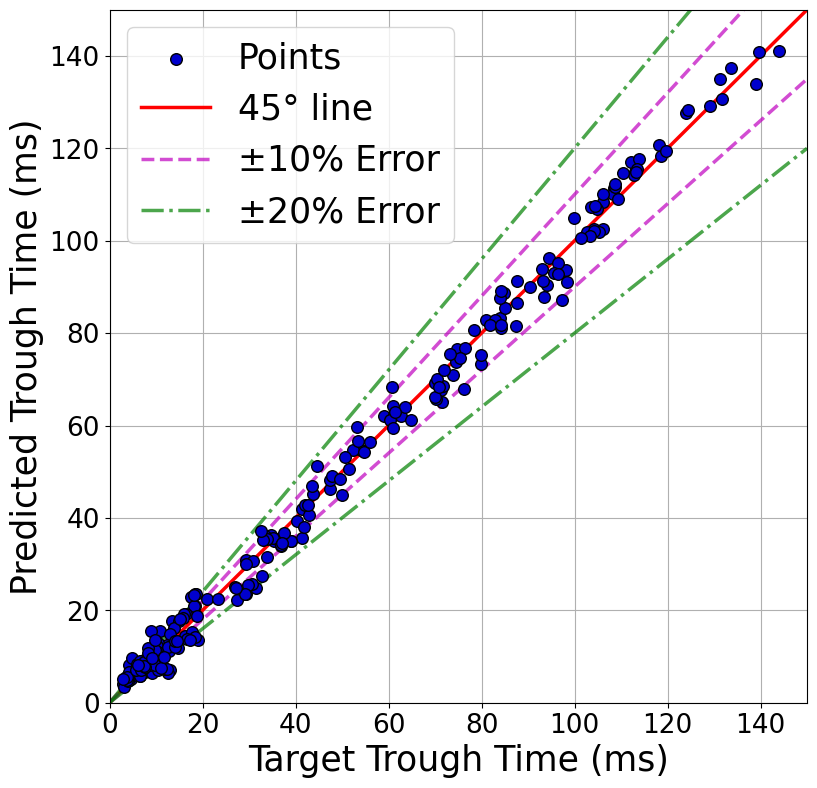

In [20]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Trough Time (ms)',fontsize = 25)
plt.xlabel('Target Trough Time (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,150)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 150)
plt.xlim(0, 150)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Trough_ANN2.png', dpi = 300, bbox_inches = 'tight')

In [22]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

39/39 [==============================] - 0s 1ms/step
2.395278675179027
2.3964084004393658


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9943220361487136


In [24]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9934855753820772


In [25]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 57.79%
Within 20% margin 78.33%
Out of 20% margin 21.67%


In [26]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9942562682276562


In [27]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

2.9859178858211983

In [28]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

2.3964084004393658